![Image](./resources/cropped-SummerWorkshop_Header.png)

<h1 align="center">Population Coding</h1> 
<h2 align="center"> Day 2 Problem Sets</h2> 

<h3 align="center">Tuesday, August 22, 2023</h3> 

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #DFF0D8; ">

<h2> Morning session </h2>

1. How does decoding accuracy change for different stimulus types (e.g. natural scenes, static gratings)?

In [1]:
# Getting started: import packages, create cache object, load data for one session

import numpy as np    # used for creating and manipulating arrays

import matplotlib.pyplot as plt  # used for plotting data
%matplotlib inline

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

manifest_path = '/data/allen-brain-observatory/visual-coding-neuropixels/ecephys-cache/manifest.json' 

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

session_id = 798911424 

session = cache.get_session_data(session_id)

OSError: [Errno 30] Read-only file system: '/data'

In [2]:
# Load stimulus presentations and filter for natural scenes trials

from allensdk.brain_observatory.ecephys.stimulus_table import naming_utilities

def passthrough_function(input):
    return input

naming_utilities.standardize_movie_numbers = passthrough_function
session.naming_utilities = naming_utilities # this is needed to circumvent a bug in the AllenSDK

stimulus_presentations = session.stimulus_presentations

stimulus_presentations_ns = stimulus_presentations[stimulus_presentations.stimulus_name == 'natural_scenes']

In [3]:
# Load units table & filter for V1 units

units = session.units

units_VISp = units[units.ecephys_structure_acronym == 'VISp']

In [4]:
# Now extract the spike counts

# Hint: each trial is 250 ms long

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #DFF0D8; ">

2. How does decoding accuracy vary across brain regions?

In [5]:
# Hint: try using a non-visual region

units_CA1 = units[units.ecephys_structure_acronym == 'CA1']

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #DFF0D8; ">

3. What is the minimum amount of time within a trial needed to achieve high decoding performance?

In [6]:
# Hint: try drifting gratings, because each stimulus is longer (2 s)

# Hint: to select a time slice of the firing rates DataArray, use:
# da.sel(time_relative_to_stimulus_onset=slice(start,end))

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #DFF0D8; ">

4. How does decoding performance change with behavioral state (e.g. running vs. stationary)?

In [7]:
# How to load running speed:

running_speed = session.running_speed

running_speed.head()

,start_time,end_time,velocity
0,24.82399,24.83961,-1.060405
1,24.83961,24.85607,0.827345
2,24.87287,24.88942,-2.572146
3,24.88942,24.90628,3.667684
4,24.92289,24.93947,0.259265


Text(0, 0.5, 'Count')

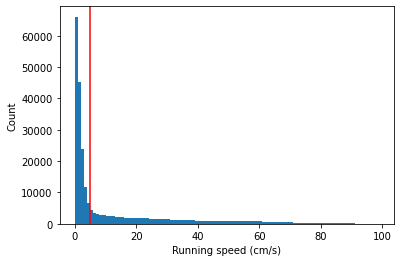

In [8]:
# Plot a histogram of speeds, showing a running vs stationary threshold of 5 cm/s:

plt.hist(running_speed.velocity.values, bins=np.arange(0,100))
plt.axvline(5, color='r')
plt.xlabel('Running speed (cm/s)')
plt.ylabel('Count')

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #DFF0D8; ">

5. Try to estimate the contribution of individual neurons to the population decoding accuracy. One way to do this would be to compute the decoding accuracy with all neurons except one, and examine how this changes decoding accuracy.

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">

<h2> Afternoon session </h2>

1. Study the dimensionality of the trial shuffled population activities. How much of the low-dimensionality can be attributed to signal correlations vs noise correlations?

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">

2. How is decoding of different stimulus attributes affected by noise correlation? (e.g., natural scenes, etc.)

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">

3. How much does the dependence of decoding on noise correlations vary between brain regions?

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">

4. How are noise correlations affected by behavioral state? For example, how much of that correlation is driven by neurons responding similarly to global behavioral changes, vs other variables?

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">

5. How much do the signal and noise correlations vary between brain regions?

<div style="border-left: 3px solid #000; padding: 10px; padding-left: 10px; padding-bottom: 10px; background: #c8e0bf; ">

6. Try running a classifier on the principal components of the firing rate matrix. How many PCs do you need to match the decoding accuracy of the full dataset?